### Mean field model with a layered circuit

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/IPP_WANG")

In [2]:
import numpy as np
import xarray as xr
import nest
import src.setParams
import matplotlib.pyplot as plt
import src.plot_figures as plot_figures
import src.plot_utils as plot
import src.meanfieldcircuit as meanfield
import src.setParams as setParams

from tqdm import tqdm


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Mar  6 2023 09:12:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
nest.set_verbosity("M_ERROR")

### Simulation parameters

In [4]:
lnt = 20

In [5]:
nest.set_verbosity("M_ERROR")

### Model parameters

In [6]:
simtime = 10000.  # ms
trans   = 0.2     # ms
dt      = 0.2     # ms
seed    = 100

### Simulation

In [7]:
# Model parameters (default is Weak GBA)
params = setParams.get_params_rate_model()

In [8]:
# Simulating Weak GBA
r_w = meanfield.simulate(simtime = simtime, dt = dt, params=params, max_cond = False, seed = 10, sigma=.0)

In [9]:
tidx, r_w, max_freq_w = r_w.times.data, r_w.data, r_w.attrs["max_freq"]

In [10]:
# Model parameters (default is Strong GBA)
params = setParams.get_params_rate_model(gba='strong-gba')
# Simulating Strong GBA
r_s = meanfield.simulate(simtime = simtime, dt = dt, params=params, max_cond = False, seed = 10, sigma=.0)

In [11]:
tidx, r_s, max_freq_s = r_s.times.data, r_s.data, r_s.attrs["max_freq"]

Varying $\mu_{ee}$ for weak and strong GBA (with and withoud max condition)

In [12]:
muee_vec    = np.arange(20,52,2, dtype=float)
max_r_24c_f = np.zeros([muee_vec.shape[0],2]) # Store max freq in 24c with max_cond = False
max_r_24c_t = np.zeros([muee_vec.shape[0],2]) # Store max freq in 24c with max_cond = True
#params['Iext']            = 22.05*1.9
params = setParams.get_params_rate_model()

for uu in [0,1]:
    for i in range(muee_vec.shape[0]):
        if uu == 1:
            params['weights']['wei']  = 19.7 + (muee_vec[i]-33.7)*55.0/178.0
        else:
            params['weights']['wei']  = 19.7
        params['weights']['muee'] = muee_vec[i]
        r = meanfield.simulate(simtime = simtime, dt = dt, params = params, seed = 10, max_cond = False)
        t,r,max_freq = r.times.data, r.data, r.attrs["max_freq"]
        max_r_24c_f[i,uu] = max_freq[-1]-10
        if max_r_24c_f[i,uu] > 500.:
            max_r_24c_f[i,uu] = 500.

for uu in [0,1]:
    for i in range(muee_vec.shape[0]):
        if uu == 1:
            params['weights']['wei']  = 19.7 + (muee_vec[i]-33.7)*55.0/178.0
        else:
            params['weights']['wei']  = 19.7
        params['weights']['muee'] = muee_vec[i]
        r = meanfield.simulate(simtime = simtime, dt = dt, params = params, seed = 10, max_cond = True)
        t,r,max_freq = r.times.data, r.data, r.attrs["max_freq"]
        max_r_24c_t[i,uu] = max_freq[-1]-10
        if max_r_24c_t[i,uu] > 500.:
            max_r_24c_t[i,uu] = 500.

#### Model

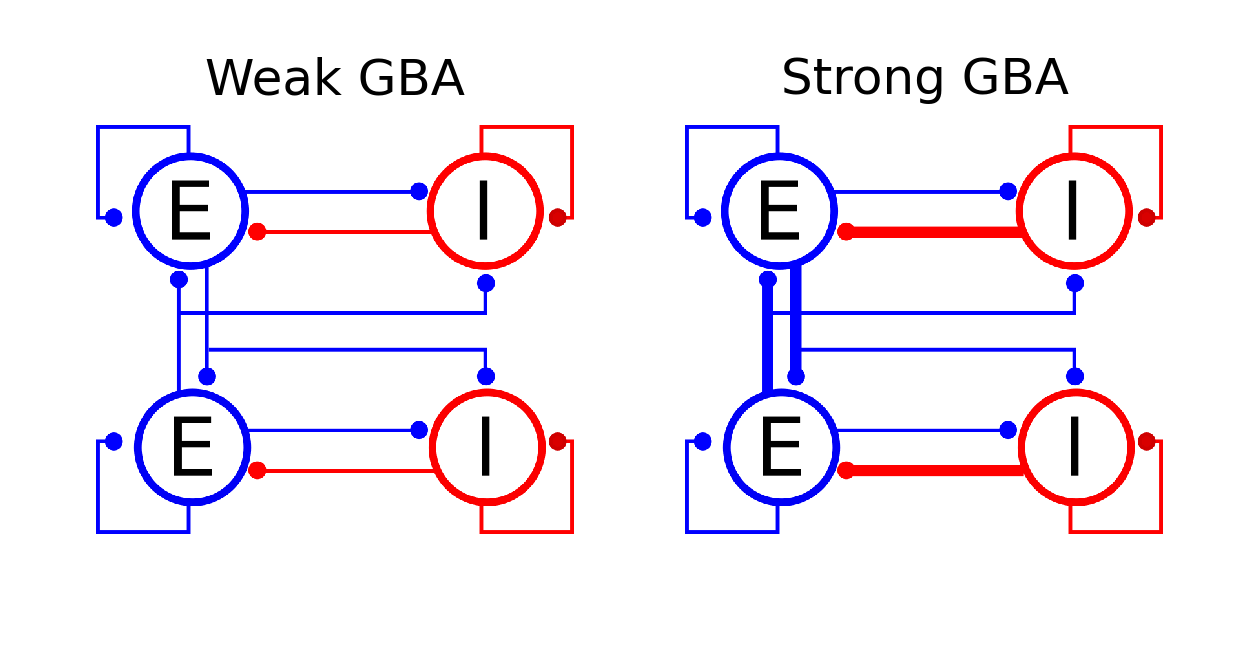

In [30]:
fig = plt.figure(figsize=(4, 2), dpi=300)


def plot_png(ax, figname):
    png = plt.imread(figname)
    plt.sca(ax)
    im = plt.imshow(png, interpolation='none')
    plt.axis('off')    
    pad = 10
    plt.xlim(-pad, png.shape[1]+pad)
    plt.ylim(png.shape[0]+pad, -pad)       
    
gs0 = fig.add_gridspec(
    nrows=1,
    ncols=2,
    left=0.05,
    right=0.95,
    hspace=0.05,
    bottom=0.05,
    top=0.95,
)

axs0 = [plt.subplot(gs0[i]) for i in range(2)]

for i in range(2):
    plot_png(axs0[i], f"figures/circuit{i + 1}.png")
    if i == 0:
        plt.title("Weak GBA")
    else:
        plt.title("Strong GBA")

bg = plot.Background(visible=False)

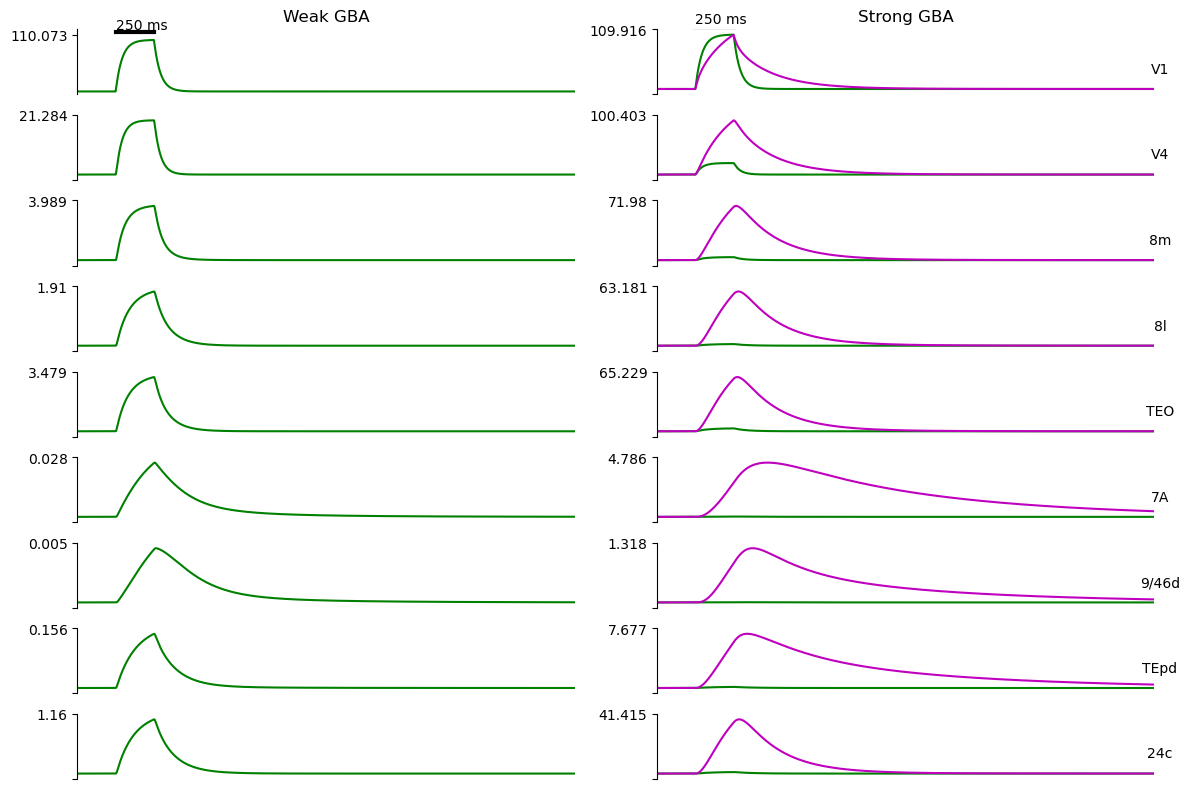

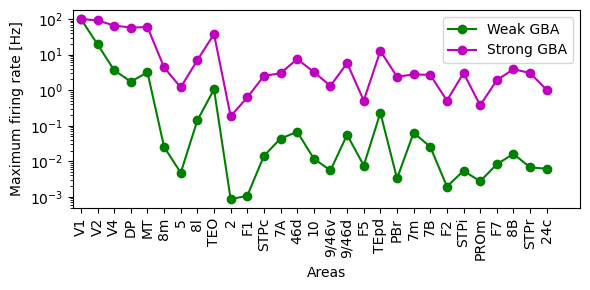

In [14]:
plt.figure(figsize=(12, 8))
plot_figures.fig3b_d(tidx, r_w, max_freq_w, r_s, max_freq_s)

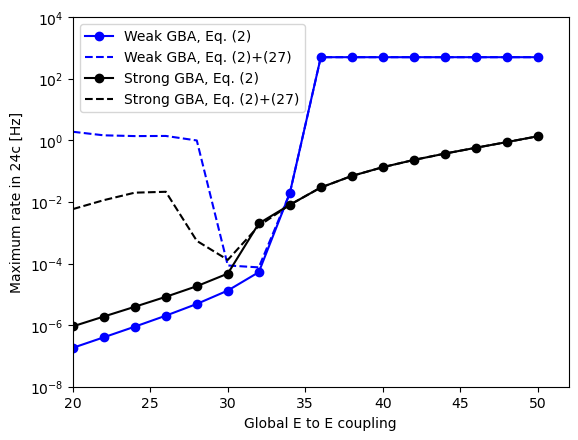

In [15]:
plot_figures.fig3_f(muee_vec, max_r_24c_t, max_r_24c_f)

In [18]:
rates = simulate_trials(gba="strong-gba", ntrials=1000, simtime=5000., dt=.1,
                    sigma=.1, onsets=[1000., 2500.], offsets=[1200., 2700.],
                        n_jobs=20, verbose=False)

/home/vinicius/anaconda3/envs/rs_joglekar/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  2%|█▋                                                                                |  : 20/1000 [00:00<00:21,   46.30it/s]


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Mar  6 2023 09:12:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Mar  6 2023 09:12:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Mar  6 2023 09:12:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


              -

100%|████████████████████████████████████████████████████████████████████████████████|  : 1000/1000 [06:06<00:00,    2.73it/s]


In [23]:
rates_mean = rates.mean("trials")

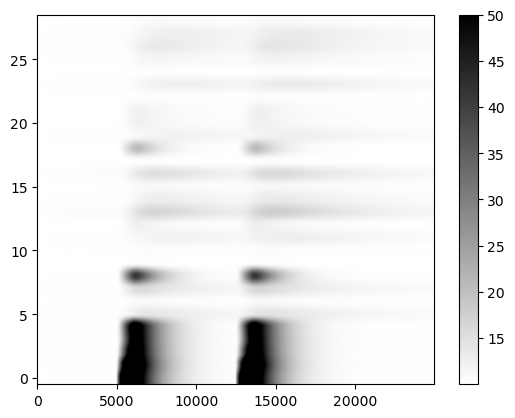

In [29]:
plt.imshow(rates_mean, aspect="auto", cmap="gray_r", origin="lower", vmax=50)
plt.colorbar()

In [ ]:
# Model parameters (default is Strong GBA)
params = setParams.get_params_rate_model(gba='strong-gba')
# Simulating Strong GBA
r_s = [] 

for i in tqdm(range(1000)):
    r_s += [meanfield.simulate(simtime = 5000., dt = dt, tON=[1000., 2500.], tOFF=[1200., 2700.],
                               params=params, max_cond = True,
                               seed = i + 1, sigma=.1)]

In [50]:
r_s = xr.concat(r_s, "trials")

In [51]:
r_s_d = r_s[..., ::30]

In [52]:
from frites.conn import conn_te

In [53]:
pairs = np.stack(([0] * 28, range(1, 29)), axis=1)

In [54]:
TE = conn_te(r_s_d, times='times', roi='roi', n_jobs=20, max_delay=40, pairs=pairs)

Defining links (n_roi=29; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=28, delays=[0:1:40])
100%|███████████████████████████████████████████████████████████████████████| Estimating TE : 28/28 [00:00<00:00,   47.30it/s]


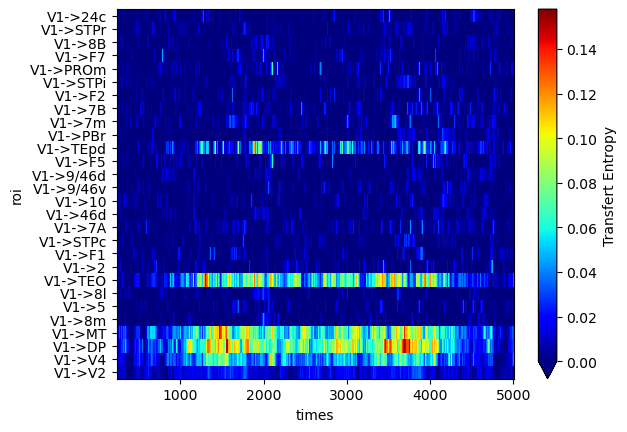

In [55]:
TE.plot.imshow(cmap="jet", vmin=0)

Text(0.5, 1.0, '')

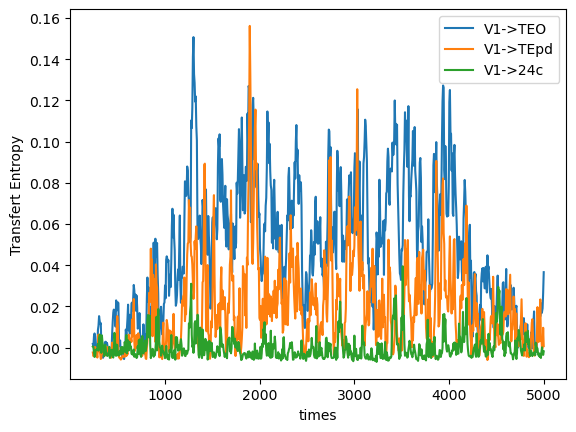

In [56]:
TE.sel(roi="V1->TEO").plot()
TE.sel(roi="V1->TEpd").plot()
TE.sel(roi="V1->24c").plot()
plt.legend(["V1->TEO", "V1->TEpd", "V1->24c"])
plt.title("")

In [39]:
from frites.core import gcmi_nd_cc #M(R(t),S(t)) or M(R,Rpast)
from frites.core import gcmi_model_nd_cd #M(R(t),Spos)
from frites.core import gccmi_nd_ccc #TE

In [40]:
AIS = []

for tau in tqdm(range(1, 100)):
    AIS += [gcmi_nd_cc(r_s_d[:100, :, :-tau].data, r_s_d[:100, :, tau:].data, traxis=0, mvaxis=1)]

100%|█████████████████████████████████████████████████████████████████████████████████████████| 99/99 [01:35<00:00,  1.04it/s]


In [ ]:
l = [len(AIS[i]) for i in range(9)]

In [ ]:
AIS = [AIS[i][:min(l)] for i in range(9)]

In [ ]:
plt.plot(np.stack(AIS, 0).mean(0)[20:])
plt.ylabel("AIS")
plt.title("time")